In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##define plot global parameters

large=22;medium=16;small=12

params={"figure.figsize":(12,10),
       "figure.titlesize":large,
       "axes.titlesize":large,
       "axes.labelsize":medium,
       "legend.fontsize":medium,
       "xtick.labelsize":medium,
       "ytick.labelsize":medium}
plt.rcParams.update(params)

##to go back to default parameter
#plt.rcParams.update(plt.rcParamsDefault)

## changing the style of your graph

plt.style.use('seaborn-whitegrid')
sns.set_style("white")

## go back to default style
#plt.style.use("default")


In [3]:
#1. Dot plot

data=pd.read_csv("mpg.csv")
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


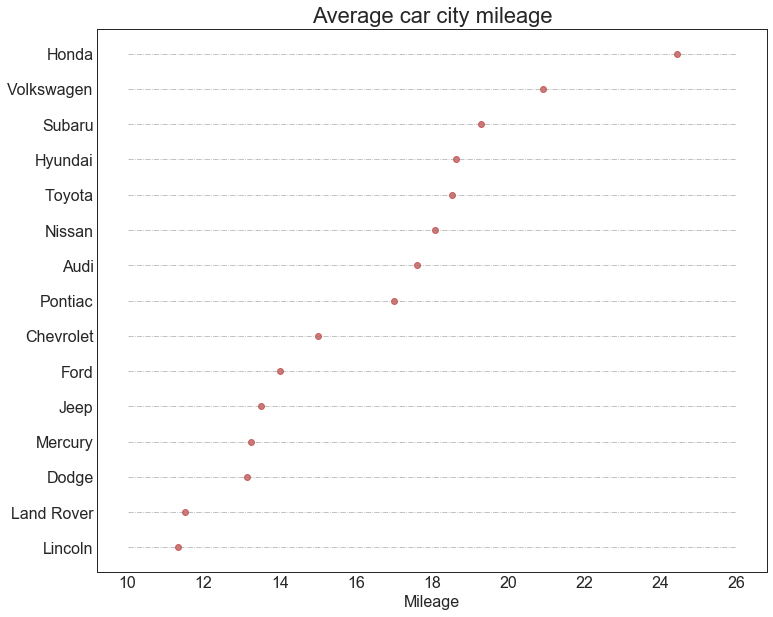

In [4]:
# create a dataframe that shows the avg of the city mileage for each car menu

## prepare data
datavis= data.groupby("manufacturer")['cty'].mean()  # shows manufacturer as index ,reset your index

datavis = datavis.reset_index() # resets the index of the data 
datavis.sort_values('cty',inplace=True)  ##or datavis=datavis.sort_values('cty')
## visualize data

plt.figure()
plt.scatter(x=datavis['cty'],
            y=datavis['manufacturer'].str.title(),#str.title to capitalize y axis words
           color="firebrick",
           alpha=0.6)
ax=plt.gca()
ax.hlines(y=datavis.manufacturer.str.title(),
         xmin=10,
         xmax=26,
         color="grey",
         alpha=0.6,
         linestyle="-.",
         linewidth=0.8)
plt.title("Average car city mileage")
plt.xlabel("Mileage")

plt.show()


##to get rid of yticks
#ax.yaxis.set_ticks_position('none')

In [26]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [5]:
#2
#create a new column called "cty_z" that holds the standardized scores for the 'cty'
#variable
#z=(x-avg)/sd
##prapre the data
data['cty_z']=(data.cty-data.cty.mean())/data.cty.std() ##to create a new column always use data['new_column'] and not data.col_name

datavis=data.groupby('manufacturer')['cty_z'].\
             mean().\
             reset_index().\
             sort_values('cty_z') #instead of \ we can use paranthesis btw start and end


# datavis=(data.groupby('manufacturer')['cty_z'].
#              mean().
#              reset_index().
#              sort_values('cty_z'))

##create a colour variable based on the sign of cty_z variable

datavis['col']=["green" if x>0 else "red" for x in datavis.cty_z]
datavis


,manufacturer,cty_z,col
8,lincoln,-1.298334,red
7,land rover,-1.259174,red
2,dodge,-0.874973,red
9,mercury,-0.847984,red
6,jeep,-0.789243,red
3,ford,-0.671760,red
1,chevrolet,-0.436795,red
11,pontiac,0.033136,green
0,audi,0.176726,green
10,nissan,0.286176,green


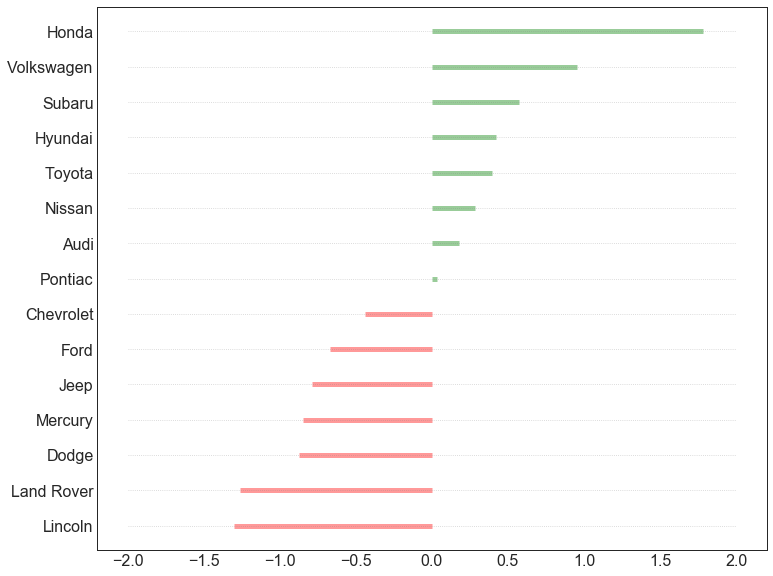

In [6]:
##plot the data
plt.figure()

ax=plt.gca()
ax.hlines(y=datavis.manufacturer.str.title(),
         xmin=0,
         xmax=datavis.cty_z,
         color=datavis.col,
         linewidth=5,
         alpha=0.4)
ax.hlines(y=datavis.manufacturer.str.title(),
          xmin=-2,
         xmax=2,
         color='grey',
         linewidth=0.8,
         alpha=0.4,
         linestyle=":")
plt.show()

In [7]:
###to access more than one column

data[['cty','hwy']]

##or

data.loc[:,['cty','hwy']]

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26
5,18,26
6,18,27
7,18,26
8,16,25
9,20,28


In [22]:
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_z
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.268102
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.972998
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.738032
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.972998
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-0.201829


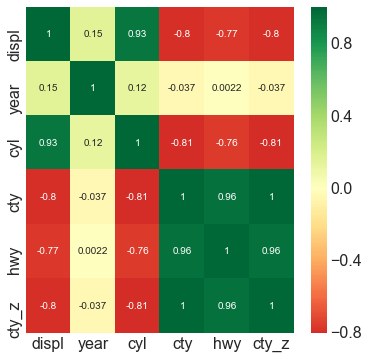

In [23]:
#3
import seaborn as sns

plt.figure(figsize = (6,6))

sns.heatmap(data.corr(),
           cmap = 'RdYlGn',
           center = 0,
           annot = True) #annotate the correlation on the graph

plt.show()


<Figure size 360x360 with 0 Axes>

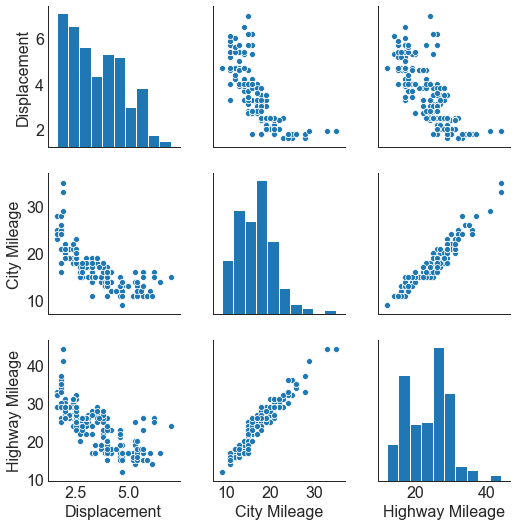

In [15]:
#4

datavis = data[['displ', 'cty','hwy']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage']
plt.figure(figsize = (5,5))
sns.pairplot(datavis)
plt.show()

In [ ]:
#5 
datavis = data[['displ', 'cty','hwy']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage']
plt.figure(figsize = (5,5))
sns.pairplot(datavis,
            kind = 'reg') #looks for smoothening techniques. This one is regression
plt.show()

<Figure size 360x360 with 0 Axes>

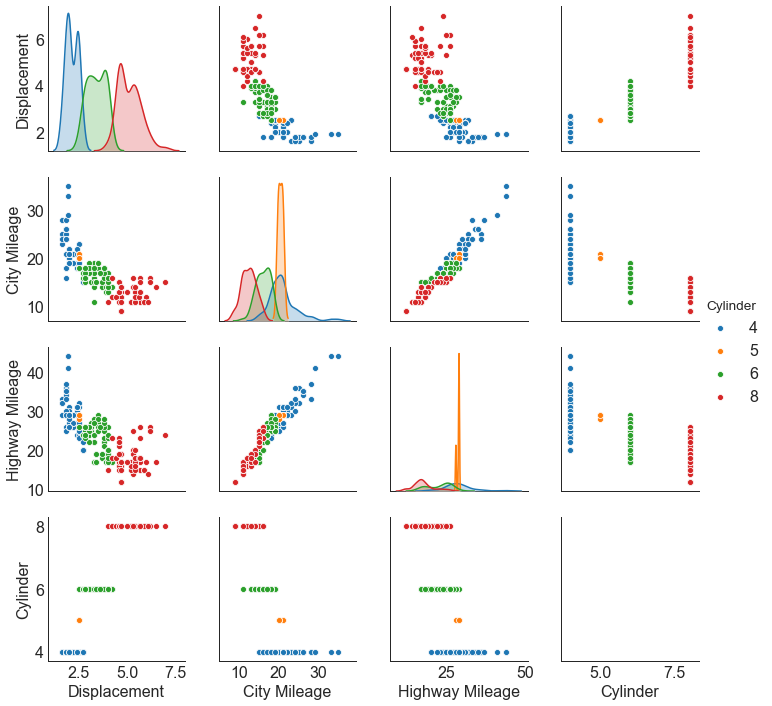

In [20]:
#6 Update the initial pairwise plot to show the relationships among the different
# car engine sizes (cyl)
datavis = data[['displ', 'cty','hwy','cyl']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage','Cylinder'] 
# ^^ Gives the columns their name
plt.figure(figsize = (5,5))
sns.pairplot(datavis,
            x_vars =  ['Displacement', 'City Mileage', 'Highway Mileage','Cylinder'], # Specifies the x-variables
            y_vars = ['Displacement', 'City Mileage', 'Highway Mileage','Cylinder'], # Specifies the y-variables
            hue = 'Cylinder') 
plt.show()